In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json


In [48]:
# Pull the data from the csv
ped_count_df = pd.read_csv("../Resource/COM_ftraffic_2019-all_locations.csv")
# Change the -ve values to 0
ped_num_df = ped_count_df._get_numeric_data()
# Convert the date into a datetime for easy sorting
ped_count_df['Date'] = pd.to_datetime(ped_count_df['Date'])
ped_count_df

/Users/catherine/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (59,60,61,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Hour,Bourke Street Mall (North),Bourke Street Mall (South),Melbourne Central,Town Hall (West),Princes Bridge,Flinders Street Station Underpass,Birrarung Marr,Webb Bridge,...,Lincoln-Swanston (W),Elizabeth St-La Trobe St (East),Lonsdale St - Elizabeth St (North),Bourke St Bridge,Bourke St - Spencer St (North),RMIT Bld 80 - 445 Swanston Street,Flinders La-Swanston St (West) Temporary,RMIT Building 14,380 Elizabeth St,La Trobe St (North)
0,2019-01-01,0,918,770,-1,3025,531,3284,2733,762,...,61,-1,373,-1,1286,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,1,995,635,-1,3077,3854,2751,1086,336,...,84,-1,290,-1,934,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,2,416,262,-1,1927,2234,2553,571,138,...,57,-1,145,-1,451,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,3,382,194,-1,998,1045,1769,208,95,...,23,-1,106,-1,340,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,4,165,106,-1,472,483,911,83,25,...,14,-1,49,-1,160,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31,19,2276,1360,3757,3455,4018,3356,1267,288,...,82,undefined,489,408,794,225,-1,528,1858,442
8756,2019-12-31,20,1993,1085,3844,3143,2529,3770,2128,365,...,71,undefined,470,372,837,125,-1,485,1926,362
8757,2019-12-31,21,1537,765,3688,3198,3230,4020,3772,456,...,58,undefined,540,590,802,4,-1,463,1796,409
8758,2019-12-31,22,1607,941,4543,3490,3253,4319,3257,541,...,53,undefined,476,1256,889,1,-1,479,1848,391


In [4]:
len(ped_count_df.columns)

64

In [5]:
ped_count_df.dtypes

Date                                        datetime64[ns]
Hour                                                 int64
Bourke Street Mall (North)                           int64
Bourke Street Mall (South)                           int64
Melbourne Central                                    int64
                                                 ...      
RMIT Bld 80 - 445 Swanston Street                   object
Flinders La-Swanston St (West) Temporary            object
RMIT Building 14                                    object
380 Elizabeth St                                    object
La Trobe St (North)                                 object
Length: 64, dtype: object

In [6]:
# Only get complete data (may still contain sensor errors, such as -1 or "undefined" values)
max_number_of_nas = 1
ped_count_df = ped_count_df.loc[:, (ped_count_df.isnull().sum(axis=0) <= max_number_of_nas)]
ped_count_df

,Date,Hour,Bourke Street Mall (North),Bourke Street Mall (South),Melbourne Central,Town Hall (West),Princes Bridge,Flinders Street Station Underpass,Birrarung Marr,Webb Bridge,...,QVM-Queen St (East),QVM-Therry St (South),Faraday St-Lygon St (West),QVM-Franklin St (North),Elizabeth St-Lonsdale St (South),Lincoln-Swanston (W),Elizabeth St-La Trobe St (East),Lonsdale St - Elizabeth St (North),Bourke St Bridge,Bourke St - Spencer St (North)
0,2019-01-01,0,918,770,-1,3025,531,3284,2733,762,...,194,301,141,446,573,61,-1,373,-1,1286
1,2019-01-01,1,995,635,-1,3077,3854,2751,1086,336,...,203,186,94,156,545,84,-1,290,-1,934
2,2019-01-01,2,416,262,-1,1927,2234,2553,571,138,...,101,131,29,90,329,57,-1,145,-1,451
3,2019-01-01,3,382,194,-1,998,1045,1769,208,95,...,73,64,15,48,251,23,-1,106,-1,340
4,2019-01-01,4,165,106,-1,472,483,911,83,25,...,36,75,14,53,85,14,-1,49,-1,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31,19,2276,1360,3757,3455,4018,3356,1267,288,...,190,114,388,175,666,82,undefined,489,408,794
8756,2019-12-31,20,1993,1085,3844,3143,2529,3770,2128,365,...,195,154,336,177,605,71,undefined,470,372,837
8757,2019-12-31,21,1537,765,3688,3198,3230,4020,3772,456,...,156,160,244,208,683,58,undefined,540,590,802
8758,2019-12-31,22,1607,941,4543,3490,3253,4319,3257,541,...,179,221,205,219,674,53,undefined,476,1256,889


In [7]:
ped_count_df.dtypes

Date                                      datetime64[ns]
Hour                                               int64
Bourke Street Mall (North)                         int64
Bourke Street Mall (South)                         int64
Melbourne Central                                  int64
Town Hall (West)                                   int64
Princes Bridge                                     int64
Flinders Street Station Underpass                  int64
Birrarung Marr                                     int64
Webb Bridge                                        int64
Southern Cross Station                             int64
Victoria Point                                     int64
Waterfront City                                    int64
New Quay                                           int64
Flagstaff Station                                  int64
Sandridge Bridge                                   int64
State Library                                      int64
Collins St (North)             

In [8]:
ped_count_df = ped_count_df.drop(["City Square","Flinders St-Swanston St (West)","Elizabeth St-La Trobe St (East)"], axis=1)

In [9]:
ped_count_df

,Date,Hour,Bourke Street Mall (North),Bourke Street Mall (South),Melbourne Central,Town Hall (West),Princes Bridge,Flinders Street Station Underpass,Birrarung Marr,Webb Bridge,...,Melbourne Central-Elizabeth St (East),QVM-Queen St (East),QVM-Therry St (South),Faraday St-Lygon St (West),QVM-Franklin St (North),Elizabeth St-Lonsdale St (South),Lincoln-Swanston (W),Lonsdale St - Elizabeth St (North),Bourke St Bridge,Bourke St - Spencer St (North)
0,2019-01-01,0,918,770,-1,3025,531,3284,2733,762,...,1650,194,301,141,446,573,61,373,-1,1286
1,2019-01-01,1,995,635,-1,3077,3854,2751,1086,336,...,1387,203,186,94,156,545,84,290,-1,934
2,2019-01-01,2,416,262,-1,1927,2234,2553,571,138,...,779,101,131,29,90,329,57,145,-1,451
3,2019-01-01,3,382,194,-1,998,1045,1769,208,95,...,588,73,64,15,48,251,23,106,-1,340
4,2019-01-01,4,165,106,-1,472,483,911,83,25,...,355,36,75,14,53,85,14,49,-1,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31,19,2276,1360,3757,3455,4018,3356,1267,288,...,2643,190,114,388,175,666,82,489,408,794
8756,2019-12-31,20,1993,1085,3844,3143,2529,3770,2128,365,...,2376,195,154,336,177,605,71,470,372,837
8757,2019-12-31,21,1537,765,3688,3198,3230,4020,3772,456,...,2151,156,160,244,208,683,58,540,590,802
8758,2019-12-31,22,1607,941,4543,3490,3253,4319,3257,541,...,2468,179,221,205,219,674,53,476,1256,889


In [10]:
location_names = ped_count_df.columns.tolist()
len(location_names)

56

In [11]:
delete_columns = []

for x in range(len(ped_count_df)):
    for y in range(2,len(ped_count_df.columns),1):
        if ped_count_df.iloc[x,y] < 0:
            delete_columns.append(location_names[y])
        else:
            pass

In [12]:
delete_columns

['Melbourne Central',
 'Flagstaff Station',
 'Flinders St-Elizabeth St (East)',
 'Flinders La-Swanston St (West)',
 'Bourke St Bridge',
 'Melbourne Central',
 'Flagstaff Station',
 'Flinders St-Elizabeth St (East)',
 'Flinders La-Swanston St (West)',
 'Bourke St Bridge',
 'Melbourne Central',
 'Flagstaff Station',
 'Flinders St-Elizabeth St (East)',
 'Flinders La-Swanston St (West)',
 'Bourke St Bridge',
 'Melbourne Central',
 'Flagstaff Station',
 'Flinders St-Elizabeth St (East)',
 'Flinders La-Swanston St (West)',
 'Bourke St Bridge',
 'Melbourne Central',
 'Flagstaff Station',
 'Flinders St-Elizabeth St (East)',
 'Monash Rd-Swanston St (West)',
 'Flinders La-Swanston St (West)',
 'Pelham St (South)',
 'Bourke St Bridge',
 'Melbourne Central',
 'Flagstaff Station',
 'Flinders St-Elizabeth St (East)',
 'Monash Rd-Swanston St (West)',
 'Flinders La-Swanston St (West)',
 'Bourke St Bridge',
 'Melbourne Central',
 'Flagstaff Station',
 'Flinders St-Elizabeth St (East)',
 'Monash Rd-Swan

In [13]:
ped_count_df.loc[178, 'Bourke St Bridge']

-1

In [14]:
del_cols_df = pd.DataFrame({"Locations":delete_columns})
del_cols = del_cols_df.Locations.value_counts()
del_cols.count()

54

In [15]:
del_cols = del_cols.reset_index()

del_cols

,index,Locations
0,Flagstaff Station,8760
1,Flinders La-Swanston St (West),8744
2,Little Collins St-Swanston St (East),3108
3,Melbourne Convention Exhibition Centre,2836
4,Flinders St-Spring St (West),2604
5,Birrarung Marr,2309
6,St Kilda Rd-Alexandra Gardens,1804
7,Alfred Place,1763
8,Waterfront City,1190
9,Flinders St-Elizabeth St (East),1065


In [16]:
delete_locations = []
for x in range(len(del_cols)):
    if del_cols["Locations"][x] >= 100:
        delete_locations.append(del_cols["index"][x])
delete_locations.sort()    
delete_locations

['Alfred Place',
 'Birrarung Marr',
 'Bourke St Bridge',
 'Bourke Street Mall (South)',
 'Collins Place (South)',
 'Flagstaff Station',
 'Flinders La-Swanston St (West)',
 'Flinders St-Elizabeth St (East)',
 'Flinders St-Spring St (West)',
 'Little Collins St-Swanston St (East)',
 'Lonsdale St - Elizabeth St (North)',
 'Melbourne Central',
 'Melbourne Convention Exhibition Centre',
 'Monash Rd-Swanston St (West)',
 'Pelham St (South)',
 'QV Market-Peel St',
 'QVM-Therry St (South)',
 'Sandridge Bridge',
 'St Kilda Rd-Alexandra Gardens',
 'State Library',
 'Tin Alley-Swanston St (West)',
 'Victoria Point',
 'Waterfront City',
 'Webb Bridge']

In [17]:
final_locs = [i for i in location_names if not i in delete_locations]
final_locs

['Date',
 'Hour',
 'Bourke Street Mall (North)',
 'Town Hall (West)',
 'Princes Bridge',
 'Flinders Street Station Underpass',
 'Southern Cross Station',
 'New Quay',
 'Collins St (North)',
 'Collins Place (North)',
 'Chinatown-Swanston St (North)',
 'Chinatown-Lt Bourke St (South)',
 'Bourke St-Russell St (West)',
 'Spencer St-Collins St (South)',
 'Spencer St-Collins St (North)',
 'QV Market-Elizabeth St (West)',
 'The Arts Centre',
 'Lonsdale St (South)',
 'Lygon St (West)',
 'Flinders St-Spark La',
 'Southbank',
 'Queen St (West)',
 'Lygon St (East)',
 'Lonsdale St-Spring St (West)',
 'Grattan St-Swanston St (West)',
 'Melbourne Central-Elizabeth St (East)',
 'QVM-Queen St (East)',
 'Faraday St-Lygon St (West)',
 'QVM-Franklin St (North)',
 'Elizabeth St-Lonsdale St (South)',
 'Lincoln-Swanston (W)',
 'Bourke St - Spencer St (North)']

In [18]:
ped_reduced_df = ped_count_df[final_locs]

In [19]:
# delete_cells = []
# delete_locs = []

# for x in range(len(ped_reduced_df)):
#     for y in range(2,len(ped_reduced_df.columns),1):
#         if ped_reduced_df.iloc[x,y] < 0:
#             delete_cells.append((x,final_locs[y]))
#             delete_locs.append(final_locs[y])
#         else:
#             pass
# delete_cells

In [20]:
ped_reduced_df.loc[171, 'Flinders St-Spark La']

-1

In [21]:
ped_reduced_df

,Date,Hour,Bourke Street Mall (North),Town Hall (West),Princes Bridge,Flinders Street Station Underpass,Southern Cross Station,New Quay,Collins St (North),Collins Place (North),...,Lygon St (East),Lonsdale St-Spring St (West),Grattan St-Swanston St (West),Melbourne Central-Elizabeth St (East),QVM-Queen St (East),Faraday St-Lygon St (West),QVM-Franklin St (North),Elizabeth St-Lonsdale St (South),Lincoln-Swanston (W),Bourke St - Spencer St (North)
0,2019-01-01,0,918,3025,531,3284,1830,4003,1441,440,...,125,539,16,1650,194,141,446,573,61,1286
1,2019-01-01,1,995,3077,3854,2751,656,1518,750,192,...,78,153,49,1387,203,94,156,545,84,934
2,2019-01-01,2,416,1927,2234,2553,240,363,259,70,...,29,50,21,779,101,29,90,329,57,451
3,2019-01-01,3,382,998,1045,1769,111,137,213,30,...,29,27,8,588,73,15,48,251,23,340
4,2019-01-01,4,165,472,483,911,29,60,79,8,...,9,4,4,355,36,14,53,85,14,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31,19,2276,3455,4018,3356,364,1757,744,153,...,591,265,121,2643,190,388,175,666,82,794
8756,2019-12-31,20,1993,3143,2529,3770,344,2289,761,212,...,596,203,79,2376,195,336,177,605,71,837
8757,2019-12-31,21,1537,3198,3230,4020,513,3497,652,256,...,539,380,39,2151,156,244,208,683,58,802
8758,2019-12-31,22,1607,3490,3253,4319,861,4996,1085,416,...,428,385,50,2468,179,205,219,674,53,889


In [22]:
keep_locs = final_locs[2:len(final_locs)]
keep_locs

['Bourke Street Mall (North)',
 'Town Hall (West)',
 'Princes Bridge',
 'Flinders Street Station Underpass',
 'Southern Cross Station',
 'New Quay',
 'Collins St (North)',
 'Collins Place (North)',
 'Chinatown-Swanston St (North)',
 'Chinatown-Lt Bourke St (South)',
 'Bourke St-Russell St (West)',
 'Spencer St-Collins St (South)',
 'Spencer St-Collins St (North)',
 'QV Market-Elizabeth St (West)',
 'The Arts Centre',
 'Lonsdale St (South)',
 'Lygon St (West)',
 'Flinders St-Spark La',
 'Southbank',
 'Queen St (West)',
 'Lygon St (East)',
 'Lonsdale St-Spring St (West)',
 'Grattan St-Swanston St (West)',
 'Melbourne Central-Elizabeth St (East)',
 'QVM-Queen St (East)',
 'Faraday St-Lygon St (West)',
 'QVM-Franklin St (North)',
 'Elizabeth St-Lonsdale St (South)',
 'Lincoln-Swanston (W)',
 'Bourke St - Spencer St (North)']

In [23]:
sensor_loc = []
sensor_mean = []


for x in range(len(keep_locs)):
    sensor_loc.append(keep_locs[x])
    temp_df = ped_reduced_df.loc[ped_reduced_df[keep_locs[x]] >= 0,["Date",keep_locs[x]]]
    print(temp_df)
    print(temp_df[keep_locs[x]].min())
    sensor_mean.append(temp_df.groupby("Date")[keep_locs[x]].mean().mean())
    


           Date  Bourke Street Mall (North)
0    2019-01-01                         918
1    2019-01-01                         995
2    2019-01-01                         416
3    2019-01-01                         382
4    2019-01-01                         165
...         ...                         ...
8755 2019-12-31                        2276
8756 2019-12-31                        1993
8757 2019-12-31                        1537
8758 2019-12-31                        1607
8759 2019-12-31                         732

[8676 rows x 2 columns]
2
           Date  Town Hall (West)
0    2019-01-01              3025
1    2019-01-01              3077
2    2019-01-01              1927
3    2019-01-01               998
4    2019-01-01               472
...         ...               ...
8755 2019-12-31              3455
8756 2019-12-31              3143
8757 2019-12-31              3198
8758 2019-12-31              3490
8759 2019-12-31              2808

[8759 rows x 2 columns]
8
          

[8759 rows x 2 columns]
3


In [24]:
sensor_df = pd.DataFrame({
    "Location": sensor_loc,
    "Daily Average": sensor_mean
})
sensor_sorted_df = sensor_df.sort_values(by="Daily Average", ascending=False)
sensor_sorted_df

,Location,Daily Average
1,Town Hall (West),1448.107093
3,Flinders Street Station Underpass,1438.111584
12,Spencer St-Collins St (North),1406.290151
0,Bourke Street Mall (North),1353.211412
18,Southbank,1251.470469
2,Princes Bridge,1235.049007
14,The Arts Centre,1110.886790
23,Melbourne Central-Elizabeth St (East),962.175645
29,Bourke St - Spencer St (North),808.694759
4,Southern Cross Station,774.859306


In [25]:
sensor_sorted_df = sensor_sorted_df.set_index("Location")

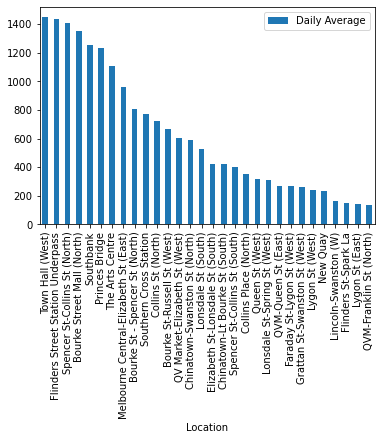

In [26]:
sensor_sorted_df.plot(kind="bar")

In [27]:
def quartiles_calcs(quartiles_y, y):
    quartiles_y = np.quantile(sensor_sorted_df,([.25,.5,.75]))
    lowerq = quartiles_y[0]
    upperq = quartiles_y[2]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    return lowerq, upperq, iqr, lower_bound, upper_bound
        
drug_0 = quartiles_calcs("quartiles_0",0)

print(f"Melbourne foot traffic has a Q1 of {drug_0[0]}, a Q3 of {drug_0[1]}, an IQR of {drug_0[2]}, a lower bound of {drug_0[3]} and upper bound of {drug_0[4]}.")

Melbourne foot traffic has a Q1 of 270.8888875728699, a Q3 of 923.805423615247, an IQR of 652.9165360423772, a lower bound of -708.4859164906959 and upper bound of 1903.1802276788128.


In [28]:
high_traffic = ["Town Hall (West)", "Spencer St-Collins St (North)", "Southbank"]
med_traffic = ["Collins St (North)","Bourke St-Russell St (West)","Chinatown-Lt Bourke St (South)"]
low_traffic = ["Flinders St-Spark La","QVM-Franklin St (North)","Lygon St (East)"]

In [40]:
all_traffic = high_traffic + med_traffic + low_traffic
sensors_final = sensor_sorted_df.loc[all_traffic]
sensors_final.to_csv("../Output/4_post_presentation/csv/sensor_locs_final_9.csv")

In [43]:
sensor_hourly_high = []
sensor_hourly_med = []
sensor_hourly_low = []

def hourly_mean(traffic_locs,b,sensor_hourly):
    temp_hourly = ped_reduced_df.loc[ped_reduced_df[traffic_locs[b]] >= 0,["Hour",traffic_locs[b]]]
    sensor_hourly.append(temp_hourly.groupby("Hour")[traffic_locs[a]].mean())

    
for a in range(3):
    hourly_mean(high_traffic,a,sensor_hourly_high)
    hourly_mean(med_traffic,a,sensor_hourly_med)
    hourly_mean(low_traffic,a,sensor_hourly_low)

    
sensor_hr_high_df = pd.DataFrame(sensor_hourly_high).T
sensor_hr_med_df = pd.DataFrame(sensor_hourly_med).T
sensor_hr_low_df = pd.DataFrame(sensor_hourly_low).T

sensor_hr_high_df.to_csv("../Output/4_post_presentation/csv/sensor_locs_hourly_high.csv")
sensor_hr_med_df.to_csv("../Output/4_post_presentation/csv/sensor_locs_hourly_med.csv")
sensor_hr_low_df.to_csv("../Output/4_post_presentation/csv/sensor_locs_hourly_low.csv")


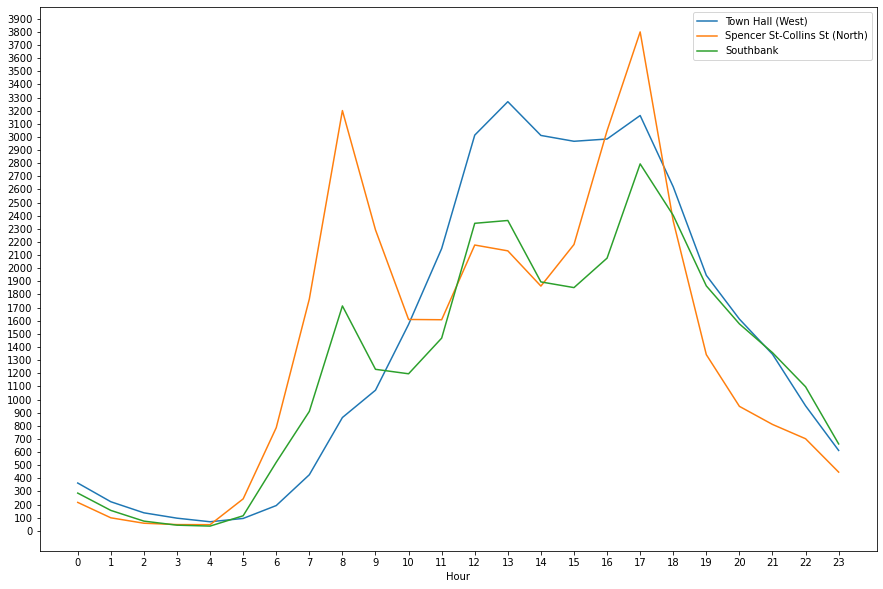

In [44]:
sensor_hr_high_df.plot(kind="line", figsize=(15,10), xticks=np.arange(0,24,1), yticks=np.arange(0,4000,100))

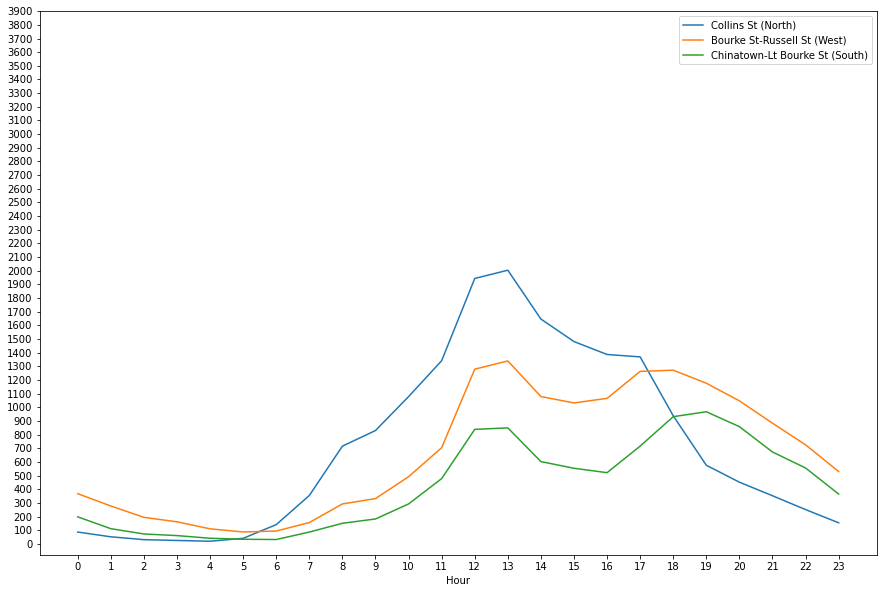

In [45]:
sensor_hr_med_df.plot(kind="line", figsize=(15,10), xticks=np.arange(0,24,1), yticks=np.arange(0,4000,100))

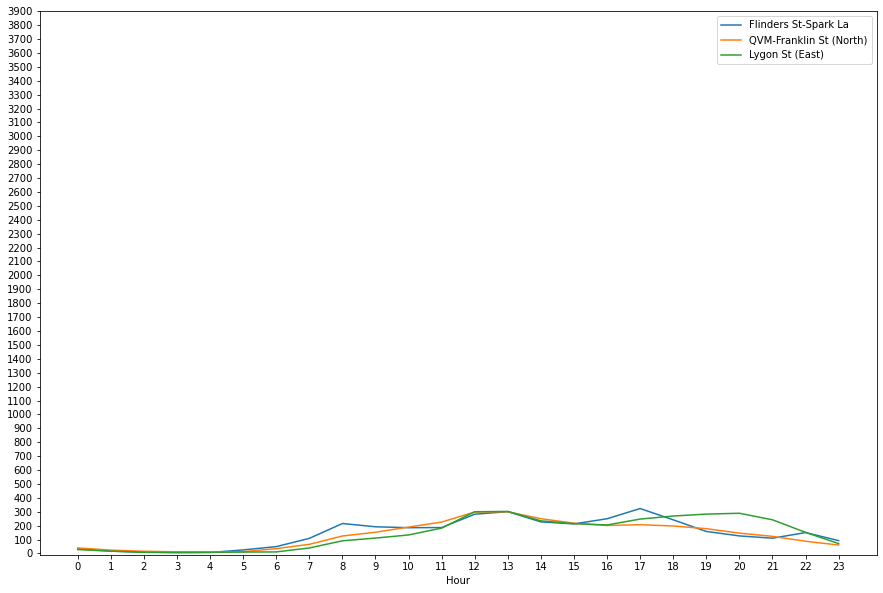

In [46]:
sensor_hr_low_df.plot(kind="line", figsize=(15,10), xticks=np.arange(0,24,1), yticks=np.arange(0,4000,100))